In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [153]:
train_full = pd.read_csv('train_full_lag1_lag2_season.csv')

In [365]:
test_full = pd.read_csv('test_full_lag1_lag2_seasonal.csv')

In [155]:
#Adding prev month category mean to train set.
category_encoding_monthly = train_full.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [156]:
category_encoding_monthly['unique'] = category_encoding_monthly['unique'] + 1

In [157]:
category_encoding_monthly.head()

,unique,item_category_id,item_cnt_month
0,1,0,1.000000
1,1,1,1.000000
2,1,2,2.522686
3,1,3,10.000000
4,1,4,1.930769


In [158]:
category_encoding_monthly.rename(columns={'item_cnt_month': 'prev_month_category_mean'}, inplace=True)

In [159]:
train_full = train_full.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [160]:
train_full.drop('Unnamed: 0', axis = 1, inplace = True)

In [161]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765,NaN


In [162]:
#Same for test.
test_full = test_full.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [163]:
test_full.drop('Unnamed: 0', axis = 1, inplace = True)

In [164]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,unique,lag2_only_item_cat,lag2_only_item,lag2_shop_item_comb,seasonal_freq_3_feature,prev_month_category_mean
0,0,5,5037,19,1,False,NaN,25.0,1693.518519,2443.0,34,2.312028,3.793103,1.0,-0.047512,1.652909
1,1,5,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,-0.047512,NaN
2,2,5,5233,19,2,False,1.0,42.0,859.000000,2443.0,34,2.312028,2.666667,3.0,-0.047512,1.652909
3,3,5,5232,23,1,False,NaN,28.0,599.000000,2203.0,34,2.201104,1.846154,NaN,-0.047512,1.651424
4,4,5,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,-0.047512,NaN


In [166]:
train_full = train_full[train_full['unique']!=0]

In [167]:
train_full.fillna(0, inplace = True)

In [366]:
np.sum(pd.isnull(test_full),axis = 0)

Unnamed: 0                      0
ID                              0
shop_id                         0
item_id                         0
item_category_id            15246
indicator                       0
is_music                    15246
lag_shop_item_comb         185520
lag_only_item               46578
item_price                 102796
lag_only_item_cat           15246
unique                          0
lag2_only_item_cat          15246
lag2_only_item              61614
lag2_shop_item_comb        187713
seasonal_freq_3_feature         0
dtype: int64

In [170]:
#Do you realise?? That the feature you are making. prev_category_mean is same as lag_item_only_cat? sum and mean.

In [171]:
#Careful imputation in test. only jisme item_category_id nan hai dont impute.

In [172]:
#Some locha with item_price in test, I had filled it with shop item combo. Now filling it only baed on item_id.
price_of_item_id = train_full.groupby('item_id')['item_price'].mean().reset_index()
price_of_item_id.rename(columns = {'item_price':'item_priceyy'}, inplace=True)

In [173]:
test_full = test_full.merge(price_of_item_id, on = 'item_id', how = 'left')

In [174]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,unique,lag2_only_item_cat,lag2_only_item,lag2_shop_item_comb,seasonal_freq_3_feature,prev_month_category_mean,item_priceyy
0,0,5,5037,19,1,False,NaN,25.0,1693.518519,2443.0,34,2.312028,3.793103,1.0,-0.047512,1.652909,1960.580473
1,1,5,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,-0.047512,NaN,NaN
2,2,5,5233,19,2,False,1.0,42.0,859.000000,2443.0,34,2.312028,2.666667,3.0,-0.047512,1.652909,844.516003
3,3,5,5232,23,1,False,NaN,28.0,599.000000,2203.0,34,2.201104,1.846154,NaN,-0.047512,1.651424,792.527697
4,4,5,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,-0.047512,NaN,NaN


In [ ]:
test_full.drop('item_price',axis = 1 , inplace = True)

In [176]:
test_full.rename(columns={'item_priceyy':'item_price'},inplace=True)

In [177]:
np.sum(pd.isnull(test_full),axis = 0)

ID                               0
shop_id                          0
item_id                          0
item_category_id             15246
indicator                        0
is_music                     15246
lag_shop_item_comb          185520
lag_only_item                46578
lag_only_item_cat            15246
unique                           0
lag2_only_item_cat           15246
lag2_only_item               61614
lag2_shop_item_comb         187713
seasonal_freq_3_feature          0
prev_month_category_mean     15246
item_price                   15246
dtype: int64

In [178]:
test_full[-pd.isnull(test_full['item_category_id'])] = test_full[-pd.isnull(test_full['item_category_id'])].fillna(0)

In [179]:
np.sum(pd.isnull(test_full),axis = 0)

ID                              0
shop_id                         0
item_id                         0
item_category_id            15246
indicator                       0
is_music                    15246
lag_shop_item_comb          15246
lag_only_item               15246
lag_only_item_cat           15246
unique                          0
lag2_only_item_cat          15246
lag2_only_item              15246
lag2_shop_item_comb         15246
seasonal_freq_3_feature         0
prev_month_category_mean    15246
item_price                  15246
dtype: int64

In [180]:
#Now the knn of imputing these 15426 items.
#Mean of 15 nearest neighbours in terms of item ids.
from sklearn.neighbors import NearestNeighbors

In [182]:
for_nn = test_full['item_id'].drop_duplicates()

In [183]:
neigh = NearestNeighbors(n_neighbors=15)

In [184]:
neigh.fit(np.expand_dims(for_nn,-1))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=15, p=2, radius=1.0)

In [185]:
vio = neigh.kneighbors(np.expand_dims(for_nn,-1))

In [186]:
nn15 = pd.DataFrame({'neigbor1':vio[1][:,0],
                          'neigbor2':vio[1][:,1],
                          'neigbor3':vio[1][:,2],
                          'neigbor4':vio[1][:,3],
                          'neigbor5':vio[1][:,4],
                          'neigbor6':vio[1][:,5],
                          'neigbor7':vio[1][:,6],
                          'neigbor8':vio[1][:,7],
                          'neigbor9':vio[1][:,8],
                          'neigbor10':vio[1][:,9],
                          'neigbor11':vio[1][:,10],
                          'neigbor12':vio[1][:,11],
                          'neigbor13':vio[1][:,12],
                          'neigbor14':vio[1][:,13],
                          'neigbor15':vio[1][:,14],
                          'item_id':for_nn.values})

In [187]:
submit = test_full.copy()

In [188]:
submit = submit.merge(nn15, on='item_id', how = 'left')

In [361]:
test_full.to_csv('test_prev_cat_imputed_no_knn.csv')

In [189]:
submit.loc[pd.isnull(submit['item_category_id']),'lag2_only_item'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag2_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag2_only_item'][x])/14], axis = 0)        

In [190]:
submit.loc[pd.isnull(submit['item_category_id']),'lag2_only_item_cat'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag2_only_item_cat'][x])/14 ], axis = 0)      

In [191]:
submit.loc[pd.isnull(submit['item_category_id']),'lag2_shop_item_comb'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag2_shop_item_comb'][x])/14],axis = 0)        

In [192]:
submit.loc[pd.isnull(submit['item_category_id']),'lag_only_item'] = np.nansum(
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag_only_item'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag_only_item'][x])/14], axis = 0)       

In [193]:
submit.loc[pd.isnull(submit['item_category_id']),'lag_only_item_cat'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag_only_item_cat'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag_only_item_cat'][x])/14 ], axis = 0)      

In [194]:
submit.loc[pd.isnull(submit['item_category_id']),'lag_shop_item_comb'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['lag_shop_item_comb'][x])/14 ], axis = 0)   

In [195]:
submit.loc[pd.isnull(submit['item_category_id']),'prev_month_category_mean'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['prev_month_category_mean'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['prev_month_category_mean'][x])/14 ], axis = 0)   

In [196]:
submit.loc[pd.isnull(submit['item_category_id']),'item_price'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['item_price'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['item_price'][x])/14 ], axis = 0)

In [197]:
submit.loc[pd.isnull(submit['item_category_id']),'is_music'] = np.nansum(  
            [submit[pd.isnull(submit['item_category_id'])]['neigbor2'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor3'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor4'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor5'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor6'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor7'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor8'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor9'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor10'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor11'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor12'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor13'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor14'].apply(lambda x : submit['is_music'][x])/14 , \
            submit[pd.isnull(submit['item_category_id'])]['neigbor15'].apply(lambda x : submit['is_music'][x])/14 ], axis = 0)

In [198]:
submit['is_music'].head()

0        False
1     0.714286
2        False
3        False
4    0.0714286
Name: is_music, dtype: object

In [199]:
submit.loc[submit['is_music']>0.5, 'is_music'] = 1
submit.loc[submit['is_music']<=0.5, 'is_music'] = 0

In [201]:
test_full_knn = submit[test_full.columns]

In [234]:
test_full.columns

Index(['ID', 'shop_id', 'item_id', 'item_category_id', 'indicator', 'is_music',
       'lag_shop_item_comb', 'lag_only_item', 'lag_only_item_cat', 'unique',
       'lag2_only_item_cat', 'lag2_only_item', 'lag2_shop_item_comb',
       'seasonal_freq_3_feature', 'prev_month_category_mean', 'item_price'],
      dtype='object')

In [367]:
np.sum(pd.isnull(train_full),axis = 0)

shop_id                     0
item_id                     0
unique                      0
item_price                  0
item_cnt_month              0
item_category_id            0
is_music                    0
lag_shop_item_comb          0
lag_only_item               0
lag_only_item_cat           0
lag2_only_item_cat          0
lag2_shop_item_comb         0
lag2_only_item              0
seasonal_freq_3_feature     0
prev_month_category_mean    0
dtype: int64

In [208]:
#Now train.
train33, val33 = month_split(train_full,33)

In [209]:
xg_train_full = xgboost.DMatrix(train_full.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_full['item_cnt_month'])

In [210]:
xg_train_33 = xgboost.DMatrix(train33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train33['item_cnt_month'])

In [211]:
xg_val_33 = xgboost.DMatrix(val33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val33['item_cnt_month'])

In [214]:
#Tuning for a while.
params1 = {'max_depth': 1, 'eta': 0.5, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [215]:
progress1 = {}
xgb_model_1_05_05 = xgboost.train(params1, xg_train_33,early_stopping_rounds=30,evals = [(xg_train_33 , "train_set"),(xg_val_33,"validation_set")], evals_result=progress1
                                         ,num_boost_round=1000)

[0]	train_set-rmse:7.65212	validation_set-rmse:14.0307
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:6.92011	validation_set-rmse:13.4007
[2]	train_set-rmse:6.6074	validation_set-rmse:12.9753
[3]	train_set-rmse:6.45533	validation_set-rmse:12.9086
[4]	train_set-rmse:6.32319	validation_set-rmse:12.9083
[5]	train_set-rmse:6.26734	validation_set-rmse:12.8984
[6]	train_set-rmse:6.20142	validation_set-rmse:12.8794
[7]	train_set-rmse:6.16535	validation_set-rmse:12.8794
[8]	train_set-rmse:6.13943	validation_set-rmse:12.8326
[9]	train_set-rmse:6.11655	validation_set-rmse:12.827
[10]	train_set-rmse:6.09644	validation_set-rmse:12.8197
[11]	train_set-rmse:6.08155	validation_set-rmse:12.8197
[12]	train_set-rmse:6.07312	validation_set-rmse:12.8197
[13]	train_set-rmse:6.05492	validation_set-rmse:12.8124
[14]	train_set-rmse:6.04265	validation_set-rmse:12.7998
[15]	trai

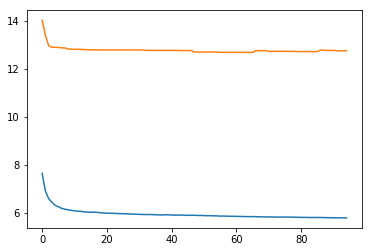

In [217]:
plt.plot(progress1['train_set']['rmse'])
plt.plot(progress1['validation_set']['rmse'])
plt.show()

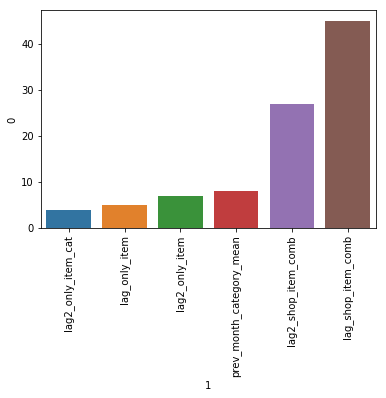

In [218]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_1_05_05.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

In [219]:
params2 = {'max_depth': 2, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [220]:
progress2 = {}
xgb_model_2_001_05 = xgboost.train(params2, xg_train_33,early_stopping_rounds=30,evals = [(xg_train_33 , "train_set"),(xg_val_33,"validation_set")], evals_result=progress2
                                         ,num_boost_round=1000)

[0]	train_set-rmse:8.77605	validation_set-rmse:14.6074
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:8.73519	validation_set-rmse:14.5793
[2]	train_set-rmse:8.69394	validation_set-rmse:14.5497
[3]	train_set-rmse:8.65564	validation_set-rmse:14.523
[4]	train_set-rmse:8.61623	validation_set-rmse:14.4968
[5]	train_set-rmse:8.57776	validation_set-rmse:14.4702
[6]	train_set-rmse:8.5413	validation_set-rmse:14.4465
[7]	train_set-rmse:8.5064	validation_set-rmse:14.4185
[8]	train_set-rmse:8.47041	validation_set-rmse:14.3946
[9]	train_set-rmse:8.43327	validation_set-rmse:14.3703
[10]	train_set-rmse:8.39981	validation_set-rmse:14.3515
[11]	train_set-rmse:8.36711	validation_set-rmse:14.3328
[12]	train_set-rmse:8.33293	validation_set-rmse:14.3089
[13]	train_set-rmse:8.2981	validation_set-rmse:14.2852
[14]	train_set-rmse:8.26543	validation_set-rmse:14.2639
[15]	train_

[144]	train_set-rmse:6.28709	validation_set-rmse:13.03
[145]	train_set-rmse:6.28119	validation_set-rmse:13.0273
[146]	train_set-rmse:6.27542	validation_set-rmse:13.0223
[147]	train_set-rmse:6.27026	validation_set-rmse:13.0171
[148]	train_set-rmse:6.26441	validation_set-rmse:13.0145
[149]	train_set-rmse:6.2594	validation_set-rmse:13.005
[150]	train_set-rmse:6.25444	validation_set-rmse:13.0034
[151]	train_set-rmse:6.24889	validation_set-rmse:13.0018
[152]	train_set-rmse:6.24369	validation_set-rmse:13.0007
[153]	train_set-rmse:6.23803	validation_set-rmse:12.998
[154]	train_set-rmse:6.23338	validation_set-rmse:12.9944
[155]	train_set-rmse:6.22822	validation_set-rmse:12.9915
[156]	train_set-rmse:6.2226	validation_set-rmse:12.9891
[157]	train_set-rmse:6.21759	validation_set-rmse:12.9867
[158]	train_set-rmse:6.21301	validation_set-rmse:12.9845
[159]	train_set-rmse:6.20854	validation_set-rmse:12.9822
[160]	train_set-rmse:6.20394	validation_set-rmse:12.9733
[161]	train_set-rmse:6.1996	validatio

[289]	train_set-rmse:5.88656	validation_set-rmse:12.7838
[290]	train_set-rmse:5.88568	validation_set-rmse:12.7832
[291]	train_set-rmse:5.88432	validation_set-rmse:12.7831
[292]	train_set-rmse:5.88352	validation_set-rmse:12.7828
[293]	train_set-rmse:5.88174	validation_set-rmse:12.7826
[294]	train_set-rmse:5.88042	validation_set-rmse:12.7821
[295]	train_set-rmse:5.87935	validation_set-rmse:12.7817
[296]	train_set-rmse:5.87831	validation_set-rmse:12.7811
[297]	train_set-rmse:5.87718	validation_set-rmse:12.7809
[298]	train_set-rmse:5.87564	validation_set-rmse:12.7803
[299]	train_set-rmse:5.87431	validation_set-rmse:12.7801
[300]	train_set-rmse:5.87335	validation_set-rmse:12.7802
[301]	train_set-rmse:5.87201	validation_set-rmse:12.7796
[302]	train_set-rmse:5.87076	validation_set-rmse:12.7779
[303]	train_set-rmse:5.86945	validation_set-rmse:12.7772
[304]	train_set-rmse:5.86855	validation_set-rmse:12.7773
[305]	train_set-rmse:5.86745	validation_set-rmse:12.777
[306]	train_set-rmse:5.86671	val

[434]	train_set-rmse:5.75547	validation_set-rmse:12.7341
[435]	train_set-rmse:5.75465	validation_set-rmse:12.7338
[436]	train_set-rmse:5.75396	validation_set-rmse:12.7338
[437]	train_set-rmse:5.75329	validation_set-rmse:12.7335
[438]	train_set-rmse:5.75264	validation_set-rmse:12.7334
[439]	train_set-rmse:5.75204	validation_set-rmse:12.7334
[440]	train_set-rmse:5.75085	validation_set-rmse:12.7334
[441]	train_set-rmse:5.74994	validation_set-rmse:12.7331
[442]	train_set-rmse:5.74932	validation_set-rmse:12.7328
[443]	train_set-rmse:5.74851	validation_set-rmse:12.7327
[444]	train_set-rmse:5.74804	validation_set-rmse:12.7327
[445]	train_set-rmse:5.7474	validation_set-rmse:12.7325
[446]	train_set-rmse:5.7467	validation_set-rmse:12.7325
[447]	train_set-rmse:5.74644	validation_set-rmse:12.7325
[448]	train_set-rmse:5.74617	validation_set-rmse:12.7324
[449]	train_set-rmse:5.74565	validation_set-rmse:12.7323
[450]	train_set-rmse:5.745	validation_set-rmse:12.7322
[451]	train_set-rmse:5.74452	valida

[579]	train_set-rmse:5.68369	validation_set-rmse:12.7094
[580]	train_set-rmse:5.6831	validation_set-rmse:12.7093
[581]	train_set-rmse:5.68268	validation_set-rmse:12.7092
[582]	train_set-rmse:5.68247	validation_set-rmse:12.7092
[583]	train_set-rmse:5.68227	validation_set-rmse:12.7092
[584]	train_set-rmse:5.68184	validation_set-rmse:12.7091
[585]	train_set-rmse:5.68159	validation_set-rmse:12.7089
[586]	train_set-rmse:5.68127	validation_set-rmse:12.7089
[587]	train_set-rmse:5.68068	validation_set-rmse:12.7089
[588]	train_set-rmse:5.68051	validation_set-rmse:12.709
[589]	train_set-rmse:5.6802	validation_set-rmse:12.7089
[590]	train_set-rmse:5.68006	validation_set-rmse:12.7089
[591]	train_set-rmse:5.67975	validation_set-rmse:12.7089
[592]	train_set-rmse:5.67922	validation_set-rmse:12.7089
[593]	train_set-rmse:5.67878	validation_set-rmse:12.7089
[594]	train_set-rmse:5.67854	validation_set-rmse:12.7088
[595]	train_set-rmse:5.67804	validation_set-rmse:12.7088
[596]	train_set-rmse:5.67732	valid

[723]	train_set-rmse:5.63575	validation_set-rmse:12.6936
[724]	train_set-rmse:5.63514	validation_set-rmse:12.6936
[725]	train_set-rmse:5.63506	validation_set-rmse:12.6928
[726]	train_set-rmse:5.63489	validation_set-rmse:12.6928
[727]	train_set-rmse:5.63465	validation_set-rmse:12.6927
[728]	train_set-rmse:5.63443	validation_set-rmse:12.6918
[729]	train_set-rmse:5.63427	validation_set-rmse:12.6918
[730]	train_set-rmse:5.63381	validation_set-rmse:12.6917
[731]	train_set-rmse:5.63138	validation_set-rmse:12.6915
[732]	train_set-rmse:5.63084	validation_set-rmse:12.6915
[733]	train_set-rmse:5.63072	validation_set-rmse:12.6915
[734]	train_set-rmse:5.63058	validation_set-rmse:12.6915
[735]	train_set-rmse:5.63051	validation_set-rmse:12.6915
[736]	train_set-rmse:5.63036	validation_set-rmse:12.6915
[737]	train_set-rmse:5.62998	validation_set-rmse:12.6899
[738]	train_set-rmse:5.62985	validation_set-rmse:12.6899
[739]	train_set-rmse:5.62973	validation_set-rmse:12.6897
[740]	train_set-rmse:5.62945	va

[868]	train_set-rmse:5.59771	validation_set-rmse:12.6755
[869]	train_set-rmse:5.59762	validation_set-rmse:12.6755
[870]	train_set-rmse:5.59744	validation_set-rmse:12.6755
[871]	train_set-rmse:5.59739	validation_set-rmse:12.6755
[872]	train_set-rmse:5.59699	validation_set-rmse:12.6754
[873]	train_set-rmse:5.59678	validation_set-rmse:12.6754
[874]	train_set-rmse:5.59659	validation_set-rmse:12.6754
[875]	train_set-rmse:5.59658	validation_set-rmse:12.6754
[876]	train_set-rmse:5.59647	validation_set-rmse:12.6754
[877]	train_set-rmse:5.59636	validation_set-rmse:12.6755
[878]	train_set-rmse:5.59613	validation_set-rmse:12.6755
[879]	train_set-rmse:5.59582	validation_set-rmse:12.6755
[880]	train_set-rmse:5.59555	validation_set-rmse:12.6747
[881]	train_set-rmse:5.59538	validation_set-rmse:12.6747
[882]	train_set-rmse:5.59467	validation_set-rmse:12.6747
[883]	train_set-rmse:5.59449	validation_set-rmse:12.6744
[884]	train_set-rmse:5.59419	validation_set-rmse:12.6744
[885]	train_set-rmse:5.59401	va

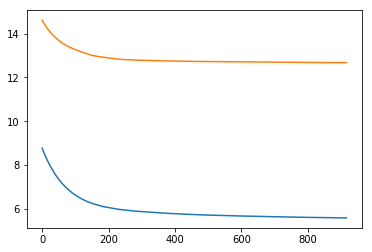

In [225]:
plt.plot(progress2['train_set']['rmse'])
plt.plot(progress2['validation_set']['rmse'])
plt.show()

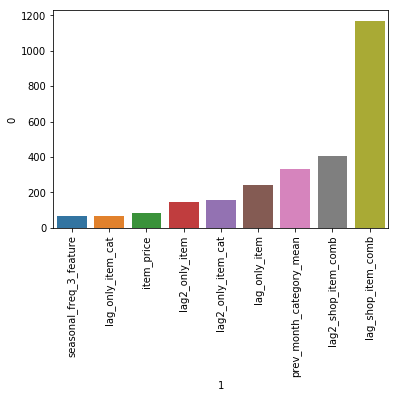

In [224]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_2_001_05.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

In [226]:
params3 = {'max_depth': 3, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [227]:
progress3 = {}
xgb_model_3_001_1 = xgboost.train(params3, xg_train_33,early_stopping_rounds=30,evals = [(xg_train_33 , "train_set"),(xg_val_33,"validation_set")], evals_result=progress3
                                         ,num_boost_round=1000)

[0]	train_set-rmse:8.77307	validation_set-rmse:14.6103
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:8.72818	validation_set-rmse:14.5826
[2]	train_set-rmse:8.68394	validation_set-rmse:14.5549
[3]	train_set-rmse:8.64033	validation_set-rmse:14.5265
[4]	train_set-rmse:8.59734	validation_set-rmse:14.4997
[5]	train_set-rmse:8.55484	validation_set-rmse:14.4721
[6]	train_set-rmse:8.51296	validation_set-rmse:14.4466
[7]	train_set-rmse:8.47188	validation_set-rmse:14.4197
[8]	train_set-rmse:8.4312	validation_set-rmse:14.395
[9]	train_set-rmse:8.3913	validation_set-rmse:14.369
[10]	train_set-rmse:8.35182	validation_set-rmse:14.345
[11]	train_set-rmse:8.31296	validation_set-rmse:14.3194
[12]	train_set-rmse:8.27462	validation_set-rmse:14.2964
[13]	train_set-rmse:8.237	validation_set-rmse:14.2719
[14]	train_set-rmse:8.19974	validation_set-rmse:14.2494
[15]	train_set

[144]	train_set-rmse:6.0819	validation_set-rmse:12.8763
[145]	train_set-rmse:6.07621	validation_set-rmse:12.8742
[146]	train_set-rmse:6.07031	validation_set-rmse:12.871
[147]	train_set-rmse:6.06481	validation_set-rmse:12.8686
[148]	train_set-rmse:6.05966	validation_set-rmse:12.8664
[149]	train_set-rmse:6.05428	validation_set-rmse:12.8645
[150]	train_set-rmse:6.04863	validation_set-rmse:12.8608
[151]	train_set-rmse:6.04368	validation_set-rmse:12.8592
[152]	train_set-rmse:6.03813	validation_set-rmse:12.8516
[153]	train_set-rmse:6.03304	validation_set-rmse:12.8493
[154]	train_set-rmse:6.02803	validation_set-rmse:12.8471
[155]	train_set-rmse:6.02278	validation_set-rmse:12.8457
[156]	train_set-rmse:6.01783	validation_set-rmse:12.8439
[157]	train_set-rmse:6.01304	validation_set-rmse:12.8418
[158]	train_set-rmse:6.00823	validation_set-rmse:12.84
[159]	train_set-rmse:6.00353	validation_set-rmse:12.8379
[160]	train_set-rmse:5.99906	validation_set-rmse:12.8366
[161]	train_set-rmse:5.99443	valida

[289]	train_set-rmse:5.63402	validation_set-rmse:12.3874
[290]	train_set-rmse:5.63114	validation_set-rmse:12.3806
[291]	train_set-rmse:5.62978	validation_set-rmse:12.3804
[292]	train_set-rmse:5.62856	validation_set-rmse:12.3803
[293]	train_set-rmse:5.62744	validation_set-rmse:12.3801
[294]	train_set-rmse:5.6262	validation_set-rmse:12.3796
[295]	train_set-rmse:5.62511	validation_set-rmse:12.3797
[296]	train_set-rmse:5.62361	validation_set-rmse:12.379
[297]	train_set-rmse:5.62244	validation_set-rmse:12.3789
[298]	train_set-rmse:5.62125	validation_set-rmse:12.3773
[299]	train_set-rmse:5.62011	validation_set-rmse:12.3771
[300]	train_set-rmse:5.61886	validation_set-rmse:12.3767
[301]	train_set-rmse:5.61757	validation_set-rmse:12.3767
[302]	train_set-rmse:5.61643	validation_set-rmse:12.3767
[303]	train_set-rmse:5.61533	validation_set-rmse:12.3764
[304]	train_set-rmse:5.614	validation_set-rmse:12.3758
[305]	train_set-rmse:5.61117	validation_set-rmse:12.3739
[306]	train_set-rmse:5.6101	validat

[434]	train_set-rmse:5.49901	validation_set-rmse:12.3481
[435]	train_set-rmse:5.49859	validation_set-rmse:12.3481
[436]	train_set-rmse:5.49783	validation_set-rmse:12.3476
[437]	train_set-rmse:5.49747	validation_set-rmse:12.3476
[438]	train_set-rmse:5.49684	validation_set-rmse:12.3471
[439]	train_set-rmse:5.49638	validation_set-rmse:12.3472
[440]	train_set-rmse:5.49594	validation_set-rmse:12.3472
[441]	train_set-rmse:5.49472	validation_set-rmse:12.3472
[442]	train_set-rmse:5.49395	validation_set-rmse:12.3457
[443]	train_set-rmse:5.49343	validation_set-rmse:12.3457
[444]	train_set-rmse:5.49269	validation_set-rmse:12.3455
[445]	train_set-rmse:5.49231	validation_set-rmse:12.3455
[446]	train_set-rmse:5.49156	validation_set-rmse:12.3454
[447]	train_set-rmse:5.49116	validation_set-rmse:12.3454
[448]	train_set-rmse:5.49057	validation_set-rmse:12.3454
[449]	train_set-rmse:5.49024	validation_set-rmse:12.3454
[450]	train_set-rmse:5.48925	validation_set-rmse:12.3453
[451]	train_set-rmse:5.48885	va

In [228]:
#Training with best params3 and 450 ntree.
xgb_model_final = xgboost.train(params3, xg_train_full,evals = [(xg_train_full , "train_set")], evals_result=progress3
                                         ,num_boost_round=450)

[0]	train_set-rmse:8.92987
[1]	train_set-rmse:8.88528
[2]	train_set-rmse:8.84135
[3]	train_set-rmse:8.79806
[4]	train_set-rmse:8.7554
[5]	train_set-rmse:8.71338
[6]	train_set-rmse:8.67202
[7]	train_set-rmse:8.63119
[8]	train_set-rmse:8.59111
[9]	train_set-rmse:8.55146
[10]	train_set-rmse:8.51244
[11]	train_set-rmse:8.47393
[12]	train_set-rmse:8.43614
[13]	train_set-rmse:8.39874
[14]	train_set-rmse:8.36205
[15]	train_set-rmse:8.32574
[16]	train_set-rmse:8.29012
[17]	train_set-rmse:8.25487
[18]	train_set-rmse:8.22018
[19]	train_set-rmse:8.18596
[20]	train_set-rmse:8.15229
[21]	train_set-rmse:8.11909
[22]	train_set-rmse:8.0863
[23]	train_set-rmse:8.05408
[24]	train_set-rmse:8.02246
[25]	train_set-rmse:7.99114
[26]	train_set-rmse:7.96033
[27]	train_set-rmse:7.93002
[28]	train_set-rmse:7.90013
[29]	train_set-rmse:7.87072
[30]	train_set-rmse:7.84173
[31]	train_set-rmse:7.81314
[32]	train_set-rmse:7.78502
[33]	train_set-rmse:7.75735
[34]	train_set-rmse:7.73009
[35]	train_set-rmse:7.70336
[36]

[288]	train_set-rmse:5.81311
[289]	train_set-rmse:5.8099
[290]	train_set-rmse:5.80827
[291]	train_set-rmse:5.80716
[292]	train_set-rmse:5.80561
[293]	train_set-rmse:5.80442
[294]	train_set-rmse:5.80327
[295]	train_set-rmse:5.80015
[296]	train_set-rmse:5.79902
[297]	train_set-rmse:5.79788
[298]	train_set-rmse:5.79655
[299]	train_set-rmse:5.79542
[300]	train_set-rmse:5.79234
[301]	train_set-rmse:5.79121
[302]	train_set-rmse:5.79007
[303]	train_set-rmse:5.78864
[304]	train_set-rmse:5.78753
[305]	train_set-rmse:5.78644
[306]	train_set-rmse:5.78539
[307]	train_set-rmse:5.7843
[308]	train_set-rmse:5.78132
[309]	train_set-rmse:5.77981
[310]	train_set-rmse:5.77886
[311]	train_set-rmse:5.77656
[312]	train_set-rmse:5.77555
[313]	train_set-rmse:5.77452
[314]	train_set-rmse:5.77328
[315]	train_set-rmse:5.77203
[316]	train_set-rmse:5.77098
[317]	train_set-rmse:5.77001
[318]	train_set-rmse:5.76901
[319]	train_set-rmse:5.76696
[320]	train_set-rmse:5.76405
[321]	train_set-rmse:5.76316
[322]	train_set-

In [235]:
lm_model_for_cv = LinearRegression().fit(train33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1),train33['item_cnt_month'])

In [229]:
lm_model_final = LinearRegression().fit(train_full.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1),train_full['item_cnt_month'])

16

In [231]:
test_full_knn = test_full_knn[train_full.drop('item_cnt_month',axis = 1).columns]

In [241]:
from tqdm import tqdm

In [322]:
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
for_xg = xgb_model_3_001_1.predict(xg_val_33,ntree_limit=450)
for_lm = lm_model_for_cv.predict(val33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1))
best_error = compute_trimmed_rmse(for_xg.copy(),val33['item_cnt_month'].copy())
for alpha in tqdm(alphas):
    temp_pred = alpha*for_lm + (1-alpha)*for_xg
    temp_error = compute_trimmed_rmse(temp_pred.copy() , val33['item_cnt_month'].copy())
    if (temp_error < best_error):
        best_alpha= alpha
        best_error = temp_error

100%|██████████| 1000/1000 [00:13<00:00, 71.62it/s]


In [323]:
best_alpha

0.083

In [324]:
best_error

2.180176956943488

In [255]:
#This looks good.
test_full_knn['is_music'] = test_full_knn['is_music'].astype(np.float)
test_xg_set = xgboost.DMatrix(test_full_knn.drop(['shop_id','item_id','item_category_id','unique'], axis = 1))
test_pred_xg = xgb_model_final.predict(test_xg_set,ntree_limit=450)
test_pred_lm = lm_model_final.predict(test_full_knn.drop(['shop_id','item_id','item_category_id','unique'], axis = 1))

In [256]:
final_prediction = (1-0.083)*test_pred_xg + 0.083*test_pred_lm

In [257]:
len(np.unique(final_prediction))

23838

In [258]:
for_fun = pd.read_csv('sep5_less_005.csv')

In [259]:
max(final_prediction)

518.5732617479164

In [260]:
#Submission
submission = pd.DataFrame({'ID':test_full['ID'],'item_cnt_month':final_prediction})

In [261]:
submission.loc[submission['item_cnt_month']>20,'item_cnt_month'] = 20
submission.loc[submission['item_cnt_month']<0,'item_cnt_month'] = 0

In [263]:
min(submission['item_cnt_month'])

0.6014871043721057

In [264]:
compute_trimmed_rmse(for_fun['item_cnt_month'].copy(),submission['item_cnt_month'].copy())

2.135574940211865

In [266]:
submission2 = submission.copy()

In [267]:
submission2['item_cnt_month'] = submission2['item_cnt_month'] - 0.1

In [ ]:
submission2.loc[submission2['item_cnt_month']>20,'item_cnt_month'] = 20
submission2.loc[submission2['item_cnt_month']<0,'item_cnt_month'] = 0

In [268]:
submission2.to_csv('submit_imputed_knn-0.1.csv',index= False)

In [265]:
submission.to_csv('submit_imputed_knn.csv',index=False)

In [269]:
np.sum(pd.isnull(test_full),axis = 0)

ID                              0
shop_id                         0
item_id                         0
item_category_id            15246
indicator                       0
is_music                    15246
lag_shop_item_comb          15246
lag_only_item               15246
lag_only_item_cat           15246
unique                          0
lag2_only_item_cat          15246
lag2_only_item              15246
lag2_shop_item_comb         15246
seasonal_freq_3_feature         0
prev_month_category_mean    15246
item_price                  15246
dtype: int64

In [270]:
get_index = test_full[pd.isnull(test_full['item_category_id'])].index

In [272]:
get_index = get_index.values

In [273]:
get_index

array([     1,      4,     45, ..., 214154, 214161, 214173])

In [233]:
test_full_knn.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_category_id',
       'is_music', 'lag_shop_item_comb', 'lag_only_item', 'lag_only_item_cat',
       'lag2_only_item_cat', 'lag2_shop_item_comb', 'lag2_only_item',
       'seasonal_freq_3_feature', 'prev_month_category_mean'],
      dtype='object')

In [276]:
submission.iloc[get_index,1] = 0

In [279]:
submission.to_csv('submit_no_knn.csv',index=False)

In [280]:
max(submission['item_cnt_month'])

20.0

In [281]:
min(submission['item_cnt_month'])

0.0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


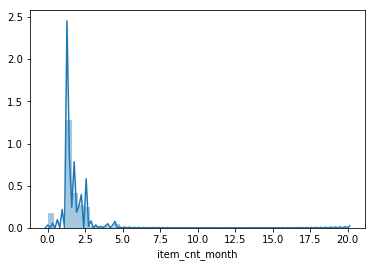

In [282]:
sns.distplot(submission['item_cnt_month'])
plt.show()

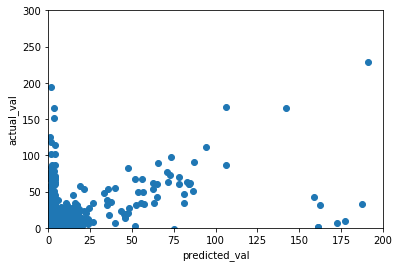

In [294]:
plt.scatter((1-0.082)*for_xg+0.082*for_lm,val33['item_cnt_month'])
plt.xlim((0,200))
plt.ylim((0,300))
plt.xlabel('predicted_val')
plt.ylabel('actual_val')
plt.show()

In [290]:
max(for_xg)

518.9113

In [296]:
#Lets try luck with randomforest, I'm overfitting.
#Forget Linear_regression it aint no good.
monitoring_data

,Unnamed: 0,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935000,2.047780,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936000,2.050922,1.09067,Lag1_Lag2_Seasonal


In [313]:
rf_n_est_1000_depth_5_sqrt_cv = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 5, n_jobs = -1, verbose = 1, max_features= "sqrt")

In [314]:
rf_n_est_1000_depth_5_sqrt_cv.fit(train33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1),train33['item_cnt_month'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [316]:
rf_n_est_1000_depth_5_sqrt_cv.score(train33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1),train33['item_cnt_month'])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   14.3s finished


0.5884115210453525

In [299]:
rf_n_est_1000_depth_5_sqrt = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 5, n_jobs = -1, verbose = 1, max_features= "sqrt")

In [302]:
rf_n_est_1000_depth_5_sqrt.fit(train_full.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1),train_full['item_cnt_month'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [312]:
??rf_n_est_1000_depth_5_sqrt.score

In [311]:
rf_n_est_1000_depth_5_sqrt.score(train_full.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1),train_full['item_cnt_month'])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   14.2s finished


0.5878080035429719

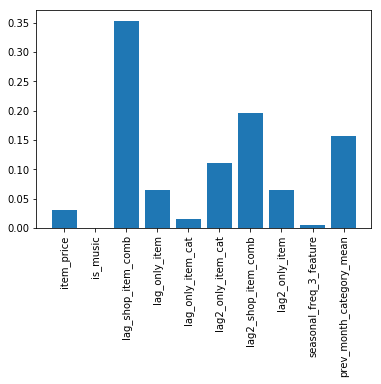

In [308]:
plt.bar(x = train_full.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1).columns.values, height = rf_n_est_1000_depth_5_sqrt.feature_importances_)
plt.xticks(rotation= 90)
plt.show()       

In [317]:
for_rf = rf_n_est_1000_depth_5_sqrt_cv.predict(val33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.7s finished


In [318]:
#Finding best alpha.
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
for_xg = xgb_model_3_001_1.predict(xg_val_33,ntree_limit=450)
#for_rf = lm_model_for_cv.predict(val33.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1))
best_error = compute_trimmed_rmse(for_xg.copy(),val33['item_cnt_month'].copy())
for alpha in tqdm(alphas):
    temp_pred = alpha*for_rf + (1-alpha)*for_xg
    temp_error = compute_trimmed_rmse(temp_pred.copy() , val33['item_cnt_month'].copy())
    if (temp_error < best_error):
        best_alpha= alpha
        best_error = temp_error

100%|██████████| 1000/1000 [00:12<00:00, 77.61it/s]


In [320]:
best_alpha

0.639

In [321]:
best_error

2.1675130615556597

In [325]:
test_xg_set = xgboost.DMatrix(test_full_knn.drop(['shop_id','item_id','item_category_id','unique'], axis = 1))

In [326]:
test_pred_xg = xgb_model_final.predict(test_xg_set,ntree_limit=450)

In [327]:
test_pred_rf = rf_n_est_1000_depth_5_sqrt.predict(test_full_knn.drop(['shop_id','item_id','item_category_id','unique'], axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.7s finished


In [329]:
submit_xg_rf = (1-0.639)*test_pred_xg + 0.639*test_pred_rf

In [330]:
max(submit_xg_rf)

497.5874200084348

In [331]:
#Submission
submission = pd.DataFrame({'ID':test_full['ID'],'item_cnt_month':submit_xg_rf})

In [332]:
submission.shape

(214200, 2)

In [333]:
submission.loc[submission['item_cnt_month']>20,'item_cnt_month'] = 20
submission.loc[submission['item_cnt_month']<0,'item_cnt_month'] = 0

In [334]:
check = pd.read_csv('sep5_less_005.csv')

In [336]:
rmse(submission2['item_cnt_month'],submission['item_cnt_month'])

0.28336729973413016

In [338]:
submission.to_csv('submit_xg_rf.csv',index=False)

In [ ]:
#Time_to_shift_notebook.

In [339]:
np.sum(pd.isnull(train_full),axis = 0)

shop_id                     0
item_id                     0
unique                      0
item_price                  0
item_cnt_month              0
item_category_id            0
is_music                    0
lag_shop_item_comb          0
lag_only_item               0
lag_only_item_cat           0
lag2_only_item_cat          0
lag2_shop_item_comb         0
lag2_only_item              0
seasonal_freq_3_feature     0
prev_month_category_mean    0
dtype: int64

In [340]:
train_full.shape

(1545898, 15)

In [341]:
checking_target = pd.read_csv('train_full_lag1_lag2_season.csv')

In [350]:
simple_check = pd.read_csv('train_imputed_pre_category_mean_no_trim.csv')

In [349]:
sum(train_full['item_cnt_month']!=checking_target['item_cnt_month'])

0

In [347]:
checking_target = checking_target[checking_target['unique']!=0]

In [352]:
simple_check.shape

(1609122, 15)

In [351]:
np.sum(pd.isnull(simple_check),axis = 0)

shop_id                         0
item_id                         0
unique                          0
item_price                      0
item_cnt_month                  0
item_category_id                0
is_music                        0
lag_shop_item_comb              0
lag_only_item                   0
lag_only_item_cat               0
lag2_only_item_cat              0
lag2_shop_item_comb             0
lag2_only_item                  0
seasonal_freq_3_feature         0
prev_month_category_mean    64373
dtype: int64

In [ ]:
##Lag2 values imputing are going to have trouble with unique 1. so removing_it too.


In [357]:
train_full_no_uni_one_two = train_full[train_full['unique']!=1]

In [358]:
train_full_no_uni_one_two.shape

(1485963, 15)

In [353]:
train_full.to_csv('train_imputed_unique_0_rem_pre_category_mean_no_trim.csv')

In [359]:
train_full_no_uni_one_two.to_csv('train_imputed_unique_0,1_rem_pre_category_mean_no_trim.csv')

In [362]:
np.sum(pd.isnull(test_full),axis = 0)

ID                              0
shop_id                         0
item_id                         0
item_category_id            15246
indicator                       0
is_music                    15246
lag_shop_item_comb          15246
lag_only_item               15246
lag_only_item_cat           15246
unique                          0
lag2_only_item_cat          15246
lag2_only_item              15246
lag2_shop_item_comb         15246
seasonal_freq_3_feature         0
prev_month_category_mean    15246
item_price                  15246
dtype: int64

In [363]:
np.sum(pd.isnull(submit),axis = 0)

ID                              0
shop_id                         0
item_id                         0
item_category_id            15246
indicator                       0
is_music                        0
lag_shop_item_comb              0
lag_only_item                   0
lag_only_item_cat               0
unique                          0
lag2_only_item_cat              0
lag2_only_item                  0
lag2_shop_item_comb             0
seasonal_freq_3_feature         0
prev_month_category_mean        0
item_price                      0
neigbor1                        0
neigbor10                       0
neigbor11                       0
neigbor12                       0
neigbor13                       0
neigbor14                       0
neigbor15                       0
neigbor2                        0
neigbor3                        0
neigbor4                        0
neigbor5                        0
neigbor6                        0
neigbor7                        0
neigbor8      

In [364]:
submit.to_csv('test_prev_cat_imputed_with_knn.csv')

In [368]:
c_more = pd.read_csv('previous_bench3.csv')

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


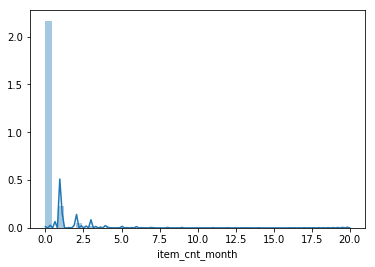

In [369]:
sns.distplot(c_more['item_cnt_month'])
plt.show()

In [370]:
need_to_learn = pd.read_csv('xg_boost4_cats.csv')

In [371]:
test_full_

,ID,item_cnt_month
0,0,0.370826
1,1,0.177906
2,2,0.601869
3,3,0.195983
4,4,0.177906


In [392]:
temp = train_full[train_full['unique']==30]['item_cnt_month'].copy()
temp[temp > 20] = 20
temp[temp < 0] = 0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


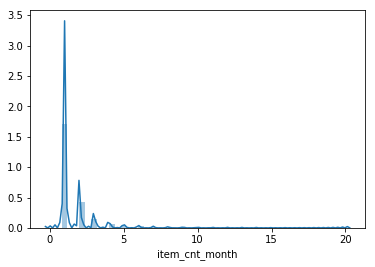

In [393]:
sns.distplot(temp)
plt.show()